Import Required Libraries

In [31]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load Dataset

In [32]:
import pandas as pd


fake = pd.read_csv("dataset/Fake.csv")
true = pd.read_csv("dataset/True.csv")

fake['label'] = 0   # Fake news
true['label'] = 1   # Real news

data = pd.concat([fake, true])
data = data.sample(frac=1).reset_index(drop=True)

data.head()


,title,text,subject,date,label
0,"Rain, Rain Go Away: Toddler Trump Throws Reco...",Donald Trump is vacationing in New Jersey righ...,News,"August 7, 2017",0
1,"Trump says pharma 'getting away with murder,' ...",NEW YORK (Reuters) - U.S. President-elect Dona...,politicsNews,"January 11, 2017",1
2,Britain welcomes Trump's renewed commitment to...,LONDON (Reuters) - Britain on Tuesday welcomed...,politicsNews,"August 22, 2017",1
3,Watch What Happens When This Guy Tries To Pic...,"Usually, men have all the advantages they ma...",News,"April 11, 2016",0
4,Congressman Gutierrez will not seek re-electio...,WASHINGTON (Reuters) - Democratic U.S. Represe...,politicsNews,"November 28, 2017",1


Data Cleaning & Exploration

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [34]:
data['label'].value_counts()


label
0    23481
1    21417
Name: count, dtype: int64

Feature Selection

In [35]:
X = data['text']
y = data['label']


Text Vectorization (TF-IDF)

In [36]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = vectorizer.fit_transform(X)


Train-Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42
)


Train model

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Prediction

In [39]:
y_pred = model.predict(X_test)


In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9859688195991091


In [41]:
def predict_news(news):
    news_vec = vectorizer.transform([news])
    result = model.predict(news_vec)
    return "REAL NEWS" if result[0] == 1 else "FAKE NEWS"

print(predict_news("Government announces new policy"))


FAKE NEWS


 Import Visualization Libraries

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


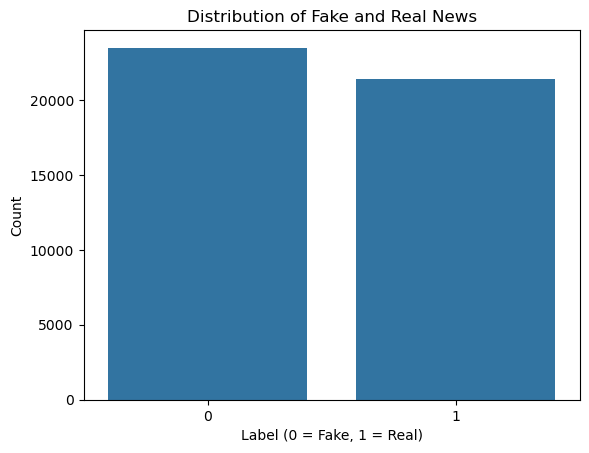

In [43]:
sns.countplot(x='label', data=data)
plt.title("Distribution of Fake and Real News")
plt.xlabel("Label (0 = Fake, 1 = Real)")
plt.ylabel("Count")
plt.show()


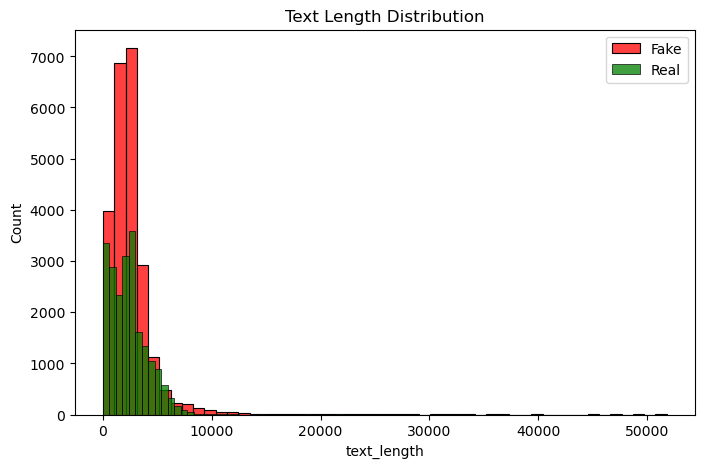

In [44]:
data['text_length'] = data['text'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(data[data['label']==0]['text_length'], color='red', label='Fake', bins=50)
sns.histplot(data[data['label']==1]['text_length'], color='green', label='Real', bins=50)
plt.legend()
plt.title("Text Length Distribution")
plt.show()


Confusion Matrix 

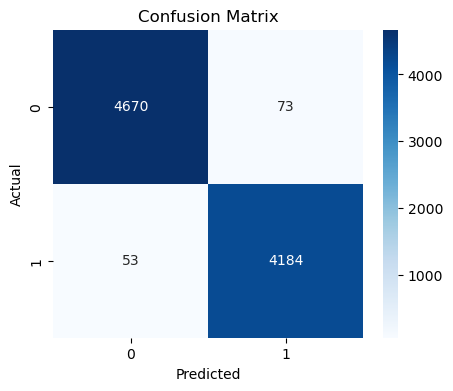

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy

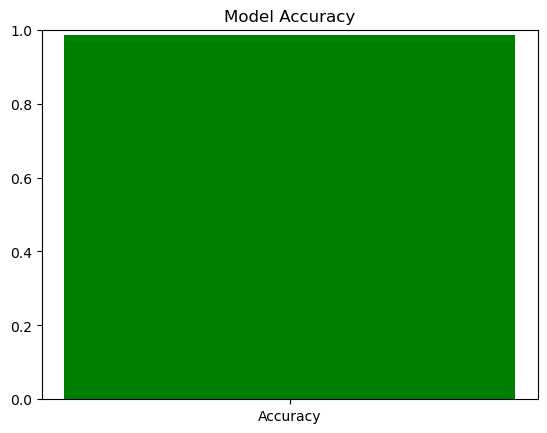

In [46]:
accuracy = accuracy_score(y_test, y_pred)

plt.bar(["Accuracy"], [accuracy], color='green')
plt.ylim(0,1)
plt.title("Model Accuracy")
plt.show()


In [47]:
import os

print(os.listdir())


['.ipynb_checkpoints', 'app.py', 'dataset', 'fake_news_model.ipynb', 'fake_news_model.py', 'model', 'requirements.txt', 'vectorizer.pkl']


In [50]:


with open("fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [51]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'app.py', 'dataset', 'fake_news_model.ipynb', 'fake_news_model.pkl', 'fake_news_model.py', 'model', 'requirements.txt', 'vectorizer.pkl']


In [52]:
import pickle

model = pickle.load(open("fake_news_model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))
